In [23]:
import numpy, math
from matplotlib import pyplot as plt
from src import code_toggle
%matplotlib inline

# Warm-up exercises

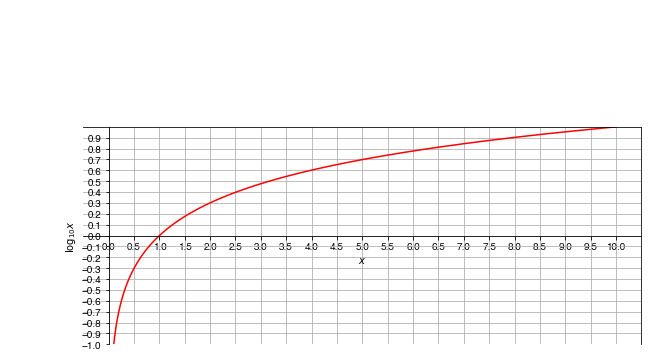

In [24]:
x = numpy.linspace(0.001, 10, 10000)

# plt.xkcd()
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(10,4))

# axis.set_xlim([0,3])
axis.set_xticks(numpy.arange(0,11,0.5))
axis.set_xlabel('$x$')
axis.set_ylim([-1,1])
axis.set_yticks(numpy.arange(-1,1,0.1))
axis.set_ylabel('$\log_{10} x$',rotation=90)
axis.spines['left'].set_position('zero')
# axis.spines['right'].set_color('none')
axis.spines['bottom'].set_position('zero')
# axis.spines['top'].set_color('none')
axis.grid()
y = numpy.log10(x)
axis.annotate('$y=x^3 + 2$',xy=(-2,2),c='r')
axis.plot(x, y,'r-')
plt.show()

code_toggle()

Using the graph above estimate 
(remember if the base of a logarithm is not given, it is assumed to be base 10)

\begin{align*}
&1. \quad  \log(2.5) &=\\
&2. \quad \log(0.5) &=\\
\end{align*}

By using your estimates and the log laws estimate the following

\begin{align*}
&3. \quad \log 50 &=\\
&4. \quad \log 2 &=\\
&5. \quad \log 8 &=\\
&6. \quad \log 800 &=\\
&7. \quad \log 1000000 &=\\
&8. \quad \log_2 8 &=\\
&9. \quad \log_8 2 &=\\
\end{align*}

10. What is $y$, if 
$$\frac{y}{2} - \frac{(y-1)}{3} = 2$$

11. What volume of a 6g/l solution is required to make 150ml of a 1.5g/l solution?


<div class="alert alert-block alert-success">
<img src="images/pointing-finger.png" width=50 title="For you" style="vertical-align:top"/>
<b>For you:</b>
Answer to Week 2 challenge. 
By moving only one number, rearrange $62 - 1 = 63$ so that it is numerically correct:
</div>

<div class="alert alert-block alert-success">
<img src="images/pointing-finger.png" width=50 title="For you" style="vertical-align:top"/>
    <b>For you:</b>
    Week 3 challenge. A camel has 300 bananas, and she has to eat 1 per mile as she goes along to fuel her locomotion. However, she can only carry 100 at a time. What is the maximum distance from her starting point in the dessert she can reach? Please send answers to <a href="mailto:philip.fowler@ndm.ox.ac.uk">philip.fowler@ndm.ox.ac.uk</a> before the start of week 3.
</div>

You'll (hopefully) find this funny by the end of the lecture

![You'll (hopefully) find this funny by the end of the lecture...](images/xkcd-newton_and_leibniz.png)

# Calculus

## Why do I need to learn calculus?

I have some bacteria growing on a plate. By taking measurements I am able to fit the following polynomial (just involves powers of $x$ and numbers) equation to your data, a bit like we did at the end of the last lecture.

$$
n(t) = 15.42 + 6t -t^2
$$

where $n(t)$ is the number of bacteria in thousands after $t$ (measured in days). When will I have the greatest number of bacteria?

<div class="alert alert-block alert-warning">
<img src="images/thinking-face.png" width=50 title="Hmm" style="vertical-align:top"/>
    <b>Thought</b>: You need calculus to answer this.
</div>

## History and confusion with other parts of Biochemistry 

Isaac Newton invented calculus while isolated during the 'plague years' of 1666-7 but did not publish his findings until much later. He defined things called *fluents* and *fluxions* these terms are no longer used. Gottfried Leibniz independently discovered what we now call calculus in 1674-75.

As we shall see later, both introduced different mathematical notations and both are still used today which can be confusing. On the whole, we tend to favour the Leibniz notation and will only occasionally use Newton notation.

The first key part to calculus is called *differentiation* which also can be confusing since the same term is used in developmental biology to mean: 

> The formation, in embryos and regenerating animals, of complex specialised cells from simple unspecialised types. The specialised cells go to make up the tissues and organs of the body.

## Gradients and rates of change

Very often we wish to know about how quickly a quantity is changing, often with time. This is called its *rate of change*. 

### Example applications

1. Rate of disapperance of substrate with time in an enzyme reaction
2. Rate of decay of a radio-labelled substance - for how long will it have an activity above a certain level?
3. Rate of bacterial growth with time.
4. Rate of heat diffusion through a rock
5. Rate of onset of boredom amongst students in a lecture...

To look at the ways in which a rate of change can be expressed and worked out mathematically, consider *graphs* (back to L1).

### Definition

The *gradient* of a curve at a point $P$ is all of:
* the gradient of the *tangent* to the curve at $P$
* the rate of change
* its 'derivative'

The process of finding the gradient mathematically is called **differentiation**.


### Gradient of a straight line

Consider having a straight line, perhaps a line of best fit we have drawn through our (perhaps transformed) experimental data.

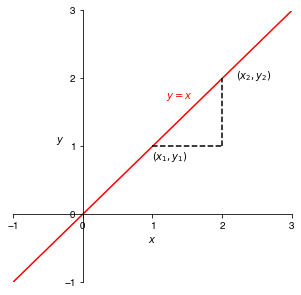

In [25]:
x = numpy.linspace(-1, 3, 5000)

# plt.xkcd()
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(5,5))

axis.set_xlim([-1,3])
axis.set_xticks(numpy.arange(-1,4))
axis.set_xlabel('$x$')
axis.set_ylim([-1,3])
axis.set_yticks([-1,0,1,2,3])
axis.set_ylabel('$y$',rotation=0)
axis.spines['left'].set_position('zero')
axis.spines['right'].set_color('none')
axis.spines['bottom'].set_position('zero')
axis.spines['top'].set_color('none')

y = x
axis.annotate('$y=x$',xy=(1.2,1.7),c='r')
axis.plot(x, y,'r-')
axis.plot((1,2),(1,1),'k--')
axis.plot((2,2),(1,2),'k--')
axis.annotate('$(x_1,y_1)$',xy=(1,0.8),c='k')
axis.annotate('$(x_2,y_2)$',xy=(2.2,2),c='k')

plt.show()

code_toggle()



Calculating the gradient is simple; we construct a triangle 

\begin{equation}
\text{gradient} = \frac{y_2 - y_1}{x_2 - x_1}
\end{equation}

The key point is because it is a straight line, our choices of $(x_1,y_1)$ and $(x_2,y_2)$ don't matter. We can have them far apart or close together and we will still get the same answer. 

### Notation

If the independent variable is $x$, then the gradient of a function, $f(x)$, can be rewritten as one of 
* y' ("y prime" or "y dash")
* f'(x) ("f dash x")
* $\frac{dy}{dx}$ ("dy by dx")

The first two are attributed to Newton whilst the last is the style Leibniz introduced. If time, $t$, is the independent variable (i.e. not $x$), then instead of $y'$, people sometimes write $\dot{y}$ ("y dot"). That is the sort of thing physicists do and we won't be doing that, but you might see it in some textbooks or online.

Generally the Leibniz form is clearer as it is directly formed from how the gradient is calculated, as we shortly shall see! The Newtonian forms are easier and faster to write, however, so sometimes people swap from one form to the other to save time. This can be confusing.

### Example functions

1. $y=x^2$.

The function is drawn below in <span style="color:red">red</span> whilst its gradient/rate of change/derivative is drawn in <span style="color:blue">blue</span>.

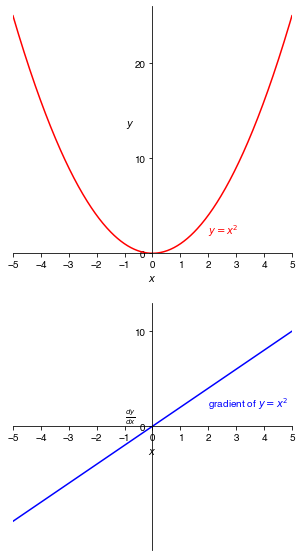

In [26]:
x = numpy.linspace(-5, 5, 500)

# plt.xkcd()
fig,axis=plt.subplots(nrows=2,ncols=1,figsize=(5,10))

for i in [0, 1]:
    axis[i].set_xlim([-5,5])
    axis[i].set_xticks(numpy.arange(-5,6))
    axis[i].set_xlabel('$x$')
    axis[i].set_ylim([0,26])
    axis[i].set_yticks([0,10,20])
    axis[i].set_ylabel('$y$',rotation=0)
    axis[i].spines['left'].set_position('zero')
    axis[i].spines['right'].set_color('none')
    axis[i].spines['bottom'].set_position('zero')
    axis[i].spines['top'].set_color('none')

y = x**2
axis[0].plot(x, y,'r-')
axis[0].annotate('$y=x^2$',xy=(2,2),c='r')


y = 2*x
axis[1].set_ylim([-13,13])
axis[1].set_ylabel('$\\frac{dy}{dx}$',rotation=0)
axis[1].plot(x, y,'b-')
axis[1].annotate('gradient of $y=x^2$',xy=(2,2),c='b')


plt.show()

code_toggle()

2. $y = \log_{10} x$

Whilst this is a more complex function we can see how the gradient is large and positive at small values of $x$ and gradually decreases as $x$ gets larger.

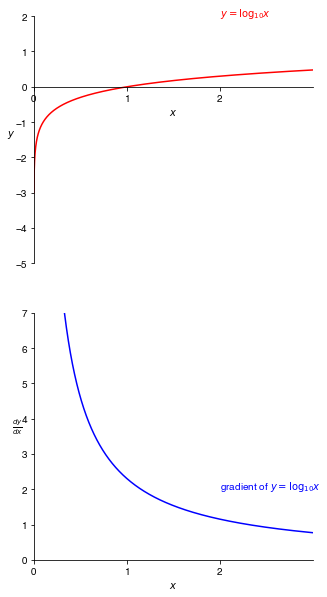

In [27]:
x = numpy.linspace(0.001, 3, 3000)

# plt.xkcd()
fig,axis=plt.subplots(nrows=2,ncols=1,figsize=(5,10))

for i in [0, 1]:
    axis[i].set_xlim([0,3])
    axis[i].set_xticks(numpy.arange(0,3))
    axis[i].set_xlabel('$x$')
    axis[i].set_ylim([-5,2])
#     axis[i].set_yticks([0,10,20])
    axis[i].set_ylabel('$y$',rotation=0)
    axis[i].spines['left'].set_position('zero')
    axis[i].spines['right'].set_color('none')
    axis[i].spines['bottom'].set_position('zero')
    axis[i].spines['top'].set_color('none')

y = numpy.log(x)/numpy.log(10)
axis[0].plot(x, y,'r-')
axis[0].annotate('$y=\log_{10} x$',xy=(2,2),c='r')


y = math.log(10)/x
axis[1].set_ylim([0,7])
axis[1].set_ylabel('$\\frac{dy}{dx}$',rotation=0)
axis[1].plot(x, y,'b-')
axis[1].annotate('gradient of $y=\log_{10} x$',xy=(2,2),c='b')


plt.show()

code_toggle()

## How do we calculate the gradient of a curve?

Suppose that

$$y=x^3 + 2$$

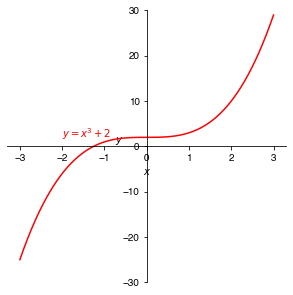

In [28]:
x = numpy.linspace(-3, 3, 5000)

# plt.xkcd()
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(5,5))

# axis.set_xlim([0,3])
axis.set_xticks(numpy.arange(-3,4))
axis.set_xlabel('$x$')
axis.set_ylim([-30,30])
#     axis[i].set_yticks([0,10,20])
axis.set_ylabel('$y$',rotation=0)
axis.spines['left'].set_position('zero')
axis.spines['right'].set_color('none')
axis.spines['bottom'].set_position('zero')
axis.spines['top'].set_color('none')

y = x**3 + 2
axis.annotate('$y=x^3 + 2$',xy=(-2,2),c='r')
axis.plot(x, y,'r-')
plt.show()

code_toggle()

We would like to ask 

> What is the gradient of the graph at any value of $x$?

but that looks too hard at the moment. Instead let's ask

> What is the gradient of the graph when $x=2$?

and we will draw triangles centred on $x=2$ to calculate the gradient, like we did before for the straight line. Let's zoom into the graph though to give us space to draw some small triangles.

First let's try a triangle where the $x$ values are separated by 1 unit i.e. $x_1=1.5$ and $x_2=2.5$.

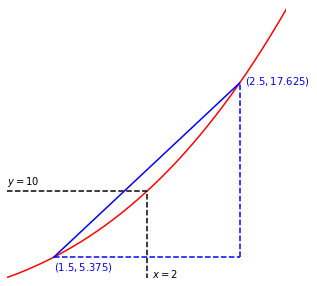

In [29]:
x = numpy.linspace(1, 3, 5000)

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(5,5))

axis.set_xlim([1.25,2.75])
axis.set_ylim([3.9,23])
axis.axis('off')

y = x**3 + 2
axis.plot(x, y,'r-')


axis.plot((2,2),(1,10),'k--')
axis.plot((1,2),(10,10),'k--')
axis.annotate('$x=2$',xy=(2.03,4),c='k')
axis.annotate('$y=10$',xy=(1.25,10.5),c='k')

axis.plot((1.5,2.5),(5.375,5.375),'b--')
axis.plot((2.5,2.5),(5.375,17.625),'b--')
axis.plot((1.5,2.5),(5.375,17.625),'b-')
axis.annotate('$(1.5,5.375)$',xy=(1.5,4.5),c='b')
axis.annotate('$(2.5,17.625)$',xy=(2.53,17.6),c='b')

plt.show()
code_toggle()

Using Equation 1 above

$$ \text{gradient} = \frac{17.625-5.375}{2.5-1.5} = 12.25 $$

but we can see how the slope of the triangle isn't *exactly* the same as the slope of the tangent at $x=2$. Making the triangle smaller should help, so let's make it five times smaller

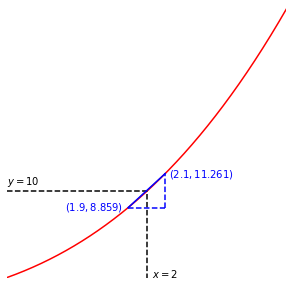

In [40]:
x = numpy.linspace(1, 3, 5000)

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(5,5))

axis.set_xlim([1.25,2.75])
axis.set_ylim([3.9,23])
axis.axis('off')

y = x**3 + 2
axis.plot(x, y,'r-')


axis.plot((2,2),(1,10),'k--')
axis.plot((1,2),(10,10),'k--')
axis.annotate('$x=2$',xy=(2.03,4),c='k')
axis.annotate('$y=10$',xy=(1.25,10.5),c='k')

axis.plot((1.9,2.1),(8.859,8.859),'b--')
axis.plot((2.1,2.1),(8.859,11.261),'b--')
axis.plot((1.9,2.1),(8.859,11.261),'b-')
axis.annotate('$(1.9,8.859)$',xy=(1.56,8.7),c='b')
axis.annotate('$(2.1,11.261)$',xy=(2.12,11),c='b')

plt.show()
code_toggle()

That looks better, but has the estimated value of the gradient changed?

$$ \text{gradient} = \frac{11.261-8.859}{2.1-1.9} = 12.01$$

So, yes, it has got a bit smaller. We could keep going and make our triangle smaller and smaller. If we were doing this on graph paper though we'd run out of space! Let's try and do it *numerically* (i.e. using a computer)

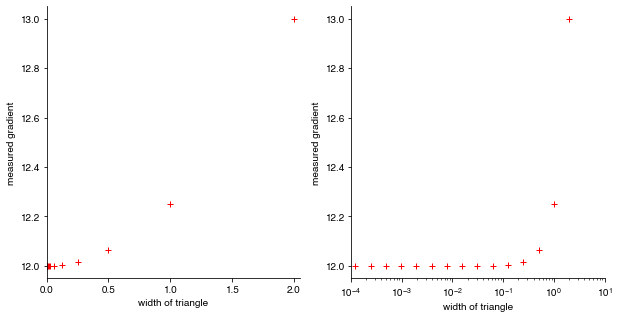

In [31]:
import numpy, math
from matplotlib import pyplot as plt
from src import code_toggle
%matplotlib inline

# define our mathematical function
def f(x):
    return x**3+2

triangle_base=2
x=2

ix=[]
iy=[]
while triangle_base>0.0001:
    x1=x-(triangle_base/2)
    x2=x+(triangle_base/2)
    y1=f(x1)
    y2=f(x2)
    gradient=(y2-y1)/(x2-x1)
    ix.append(triangle_base)
    iy.append(gradient)
    triangle_base/=2

ix=numpy.array(ix)
iy=numpy.array(iy)

fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(10,5))

for i in [0, 1]:
    axis[i].set_xlabel('width of triangle')
    axis[i].set_ylabel('measured gradient',rotation=90)
    axis[i].spines['right'].set_color('none')
    axis[i].spines['top'].set_color('none')

axis[0].spines['left'].set_position('zero')
axis[0].set_xlim([0,2.05])
axis[0].plot(ix, iy,'r+')

axis[1].set_xlim([0.0001,10])
axis[1].set_xscale('log')
axis[1].plot(ix, iy,'r+')

plt.show()

Above is how the measured gradient changes as we made the width of the triangle smaller, plotted both with linear and log x-axes. We can clearly see how as the triangle gets smaller and smaller the measured gradient appears to be getting closer and closer to 12. 

For example, if the width of the triangle is 0.02, then

$$\text{measured gradient} = \frac{10.12061 - 9.880599}{2.01-1.99} = 12.0001$$

We might infer at this point that the numbers are approaching $12.00000....$ but we can't be *sure*. Is there a way to calculate the gradient *exactly*?

Let's take a look at what we are doing. In general, we know that $y$ is some function of $x$. This is written:

$$y=f(x)$$

In our example, $y = x^3 + 2$. Rather than draw a triangle centred on $x=2$, let's draw a triangle between $x=2$ (point $P$) and $x=(2+\delta x)$ (point $Q$) where $\delta x$ means "a small but finite amount of $x$". You will see people also use an upper case delta i.e. $\Delta x$ which means the same thing.

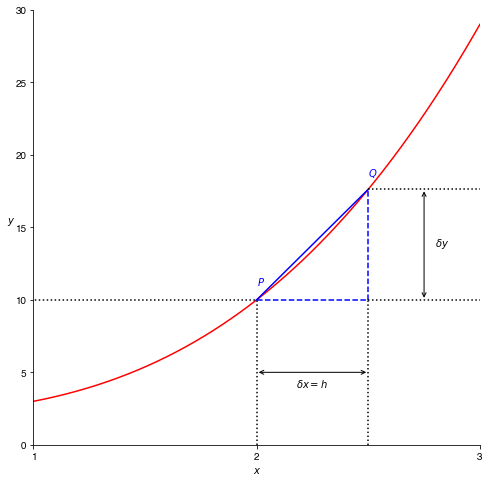

In [32]:
x = numpy.linspace(0, 3, 5000)

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(8,8))

axis.set_xlim([1,3])
axis.set_ylim([0,30])
axis.set_xticks([1,2,3])
axis.set_xlabel('$x$')
axis.set_ylabel('$y$',rotation=0)
# axis.spines['left'].set_position('zero')
axis.spines['right'].set_color('none')
axis.spines['bottom'].set_position('zero')
axis.spines['top'].set_color('none')

y = x**3 + 2
axis.plot(x, y,'r-')


axis.plot((2,2),(0,10),'k:')
axis.plot((0,2),(10,10),'k:')

axis.plot((2,2.5),(10,10),'b--')
axis.plot((2.5,2.5),(10,17.625),'b--')
axis.plot((2,2.5),(10,17.625),'b-')
axis.annotate('$P$',xy=(2,11),c='b')
axis.annotate('$Q$',xy=(2.5,18.5),c='b')

axis.plot((2.5,2.5),(0,10),'k:')
axis.plot((2.5,3),(10,10),'k:')
axis.plot((2.5,3),(17.625,17.625),'k:')

axis.annotate(s='',xy=(2,5),xytext=(2.5,5),arrowprops=dict(arrowstyle='<->'))
axis.annotate('$\delta x = h$',xy=(2.25,4),ha='center')

axis.annotate(s='',xy=(2.75,10),xytext=(2.75,17.625),arrowprops=dict(arrowstyle='<->'))
axis.annotate('$\delta y$',xy=(2.8,13.7))

plt.show()
code_toggle()

We have a triangle, so the gradient of $PQ$ is simply

$$\frac{\delta y}{\delta x} = \frac{f(x+\delta x) - f(x)}{\delta x}$$

when we start evaluating this for specific functions, it can start looking confusing due to all the $\delta x$ terms, so let's replace $\delta x$ by $h$ to make it simpler.

\begin{equation}
\boxed{\frac{\delta y}{\delta x} = \frac{f(x+h) - f(x)}{h}}
\end{equation}



## Calculating the exact gradient for our example function

\begin{align*}
y &= x^3+2\\
\frac{\delta y}{\delta x} &= \frac{[(x+h)^3 + 2] - [x^3+2]}{h} \quad &\text{by substituting our function into the boxed result above}\\
&= \frac{[(x+h)(x+h)^2 +2]- [x^3+2]}{h}\\
&= \frac{[(x+h)(x^2+2hx+h^2) +2]- [x^3+2]}{h}\\
&= \frac{[(x^3 +3x^2h +3xh^2 +h^3 +2]- [x^3+2]}{h}\\
&= \frac{3x^2h +3xh^2 +h^3}{h}\\
&= 3x^2 + 3xh + h^2\\
\end{align*}

The *crucial* thing to notice is that there is only ONE term that doesn't involve $h$ (this is $3x^2$), so if we start making $h$ very small, i.e. let $h \rightarrow 0$ (this is called 'taking the limit' and it was mentioned in L2) the other two terms also get very small.

$$\frac{\delta y}{\delta x} \biggr \rvert_{h \rightarrow 0} = 3x^2$$

The symbol $\frac{\delta y}{\delta x} \biggr \rvert_{h \rightarrow 0}$ is written as $\frac{dy}{dx}$, i.e.

$$\frac{dy}{dx} = 3x^2$$

Hence we can rewrite our main result above using limits

\begin{equation}
\boxed{\frac{dy}{dx} = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}}
\end{equation}

Unlike $\frac{\delta y}{\delta x}$ where two small but finite numbers have been divided, $\frac{dy}{dx}$ is the *gradient* of $y$ as a function of $x$. Mathematically therefore it is a whole thing and cannot be separated, although mathematical operations can be applied to it e.g. $2 \times \frac{dy}{dx}$ makes sense as this is two times the gradient.

<div class="alert alert-block alert-danger">
<img src="images/curtis.jpg" width=50 title="Python Logo" style="vertical-align:top"/>
<b>Common misconception:</b> It might look like it but $\frac{dy}{dx}$ is NOT a fraction. You CANNOT "divide through by $d$" and $dx \neq d \times x$. 
</div>

"Differentiate with respect to $x$" is the mathematical operation we are applying to $y$, and we could write this as

$$\frac{d}{dx}(y)$$

which lets us more clearly see that $\frac{d}{dx}$ is the operator which is working on $y$. Hence we could write the differential of $z$ with respect to $x$ as $\frac{dz}{dx}$. When you think of it this way you can clearly see how the above misconceptions are incorrect.

Remember that the $\frac{dy}{dx}$ notation was introduced by Leibniz and now we can see how it is more closely related to the process of considering $\frac{\delta y}{\delta x}$ and then taking the limit as $\delta x$ (or $h$) $\rightarrow 0$. If we were to write the above result using Newtonian notation we would write.

\begin{eqnarray*}
f(x) &=& x^3+2\\
f'(x) &=& 3x^2\\
\end{eqnarray*}


Going back to our example, when $x=2$

$$\frac{dy}{dx} = 3 \times (2)^2 = 12$$

which proves what we thought!

### Differentiating a polynomial

In general, if

$$y=ax^n$$

where $a$ is a constant and $n$ is a real number, then

$$\frac{dy}{dx} = anx^{n-1}$$



### Examples

1. 


\begin{eqnarray*}
y &=& x^3 + 2x^0\\
\frac{dy}{dx} &=& 3x^2 + 0\times2\times x^{-1}\\
&=& 3x^2
\end{eqnarray*}

Note 

2.

\begin{eqnarray*}
y &=& 7x^5\\
\frac{dy}{dx} &=& 7\times5x^4\\
&=& 35x^4
\end{eqnarray*}

3.

\begin{eqnarray*}
y &=& x^{-2} \\
 &=& \frac{1}{x^2}\\
\frac{dy}{dx} &=& -2x^{-3}\\
&=& \frac{-2}{x^3}
\end{eqnarray*}

4.

\begin{eqnarray*}
y &=& x^{-1/2}\\
\frac{dy}{dx} &=& -\frac{1}{2}x^{-1/2 -1}\\
&=& -\frac{1}{2}x^{-3/2}
\end{eqnarray*}

## Differentiating a differential

Yes, you can do this! If the first differential is the gradient of a function, then it is still a function (i.e. something we can plot on a graph) and so itself has a gradient. The gradient of a gradient is known as the second differential. 

In motion, how quickly your position is changing with time is your *velocity* (first differential) and how quickly your velocity is changing with time is your *acceleration* (second differential).

The notation for the second differential looks confusing but can be understood if you remember that $\frac{d}{dx}$ is the mathematical operation we are doing.

$$\frac{dy}{dx} = \frac{d}{dx}(y)$$

Hence if we apply the operation twice we get

$$\frac{d}{dx}\left(\frac{d}{dx}(y)\right) = \frac{d^2}{dx^2}(y) = \frac{d^2y}{dx^2}$$

If you don't realise which part is the operator it is hard to see why the superscripts are put where they are!

In Newtonian notation you simply add another dash.

\begin{align*}
f'(x) &= \frac{dy}{dx}\\
f''(x) &= \frac{d^2y}{dx^2}
\end{align*}

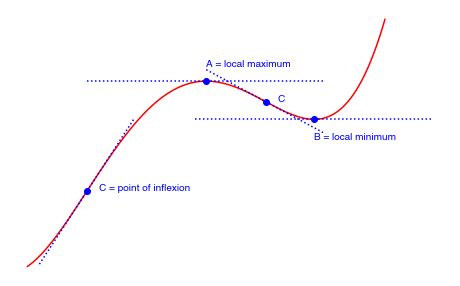

In [33]:
x = numpy.linspace(-0.5, 2.5, 5000)

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(8,5))

axis.axis('off')
axis.set_xlabel('$x$')
axis.set_ylabel('$y$',rotation=0)

y = x**4 - 3*x**3 + 5*x 
axis.plot(x, y,'r-')

axis.plot(1.5,2.4375,'bo')
axis.annotate('C',xy=(1.6,2.4375),c='b')
axis.plot((1,2),(3.3125,1.5625),'b:')

axis.plot(0,0,'bo')
axis.annotate('C = point of inflexion',xy=(0.1,0),c='b')
axis.plot((-0.4,0.4),(-2,2),'b:')

axis.plot(1,3,'bo')
axis.annotate('A = local maximum',xy=(1,3.4),c='b')
axis.plot((0,2),(3,3),'b:')

axis.plot(1.90587,1.95494,'bo')
axis.annotate('B = local minimum',xy=(1.90587,1.404),c='b')
axis.plot((0.90587,2.90587),(1.95494,1.95494),'b:')

plt.show()

code_toggle()

A and B are described as *local* since we don't know if there are other turning points elsewhere in this function.

### Maxima

Examine how the gradient (first differential, $\frac{dy}{dx}$) and the gradient of the gradient (second differential, $\frac{d^2y}{dx^2}$) changes as we pass through a maximum:

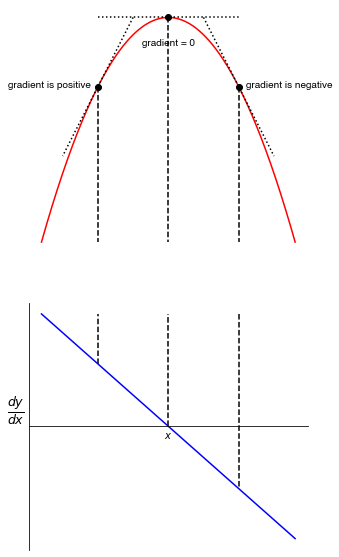

In [34]:
x = numpy.linspace(-1.8, 1.8, 5000)

fig,axis=plt.subplots(nrows=2,ncols=1,figsize=(5,10))

axis[0].axis('off')

y = -x**2
axis[0].plot(x, y,'r-')

axis[0].plot(0,0,'ko')
axis[0].annotate('gradient = 0',xy=(0,-0.4),c='k',ha='center')
axis[0].plot((-1,1),(0,0),'k:')

axis[0].plot(1,-1,'ko')
axis[0].annotate('gradient is negative',xy=(1.1,-1),c='k',ha='left')
axis[0].plot((0.5,1.5),(0,-2),'k:')

axis[0].plot(-1,-1,'ko')
axis[0].annotate('gradient is positive',xy=(-1.1,-1),c='k',ha='right')
axis[0].plot((-0.5,-1.5),(0,-2),'k:')

# axis[0].annotate('$\\frac{dy}{dx} = 0$',xy=(0,-1),ha='center',fontsize=18,c='r')

axis[0].plot((0,0),(0,-3.24),'k--')
axis[1].plot((0,0),(0,3.6),'k--')

axis[0].plot((-1,-1),(-1,-3.24),'k--')
axis[1].plot((-1,-1),(2,3.6),'k--')

axis[0].plot((1,1),(-1,-3.24),'k--')
axis[1].plot((1,1),(3.6,-2),'k--')


dydx=-2*x
# axis[1].spines['left'].set_position('zero')
axis[1].spines['right'].set_color('none')
axis[1].spines['bottom'].set_position('zero')
axis[1].spines['top'].set_color('none')
axis[1].set_xlabel('$x$')
axis[1].set_ylabel('$\\frac{dy}{dx}$',rotation=0,fontsize=18,ha='right')
axis[1].tick_params(axis='both',which='both',bottom=False,top=False,labelbottom=False,labelleft=False,left=False)
axis[1].tick_params(axis='y',which='both',bottom=False,top=False,labelbottom=False)
# axis[1].annotate('$\\frac{d^2y}{dx^2} < 0$',xy=(0,-1.5),ha='right',fontsize=18,c='b')
axis[1].plot(x, dydx,'b-')

plt.show()

code_toggle()

At a *maximum* the gradient is *zero*, and the gradient of the gradient has a *negative* slope.

### Minima

Let's do the same thing for a minima

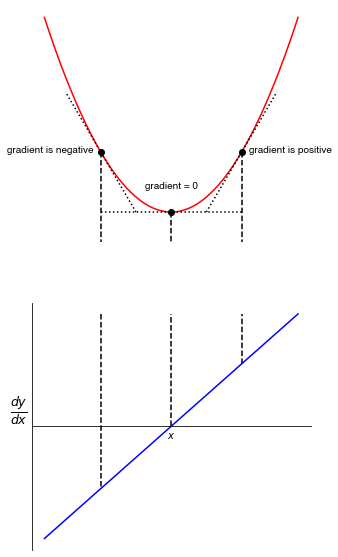

In [35]:
x = numpy.linspace(-1.8, 1.8, 5000)

fig,axis=plt.subplots(nrows=2,ncols=1,figsize=(5,10))

axis[0].axis('off')

y = x**2
axis[0].plot(x, y,'r-')

axis[0].plot(0,0,'ko')
axis[0].annotate('gradient = 0',xy=(0,0.4),c='k',ha='center')
axis[0].plot((-1,1),(0,0),'k:')

axis[0].plot(1,1,'ko')
axis[0].annotate('gradient is positive',xy=(1.1,1),c='k',ha='left')
axis[0].plot((0.5,1.5),(0,2),'k:')

axis[0].plot(-1,1,'ko')
axis[0].annotate('gradient is negative',xy=(-1.1,1),c='k',ha='right')
axis[0].plot((-0.5,-1.5),(0,2),'k:')

# axis[0].annotate('$\\frac{dy}{dx} = 0$',xy=(0,1),ha='center',fontsize=18,c='r')

axis[0].plot((0,0),(0,-0.5),'k--')
axis[1].plot((0,0),(0,3.6),'k--')

axis[0].plot((1,1),(1,-0.5),'k--')
axis[1].plot((1,1),(2,3.6),'k--')

axis[0].plot((-1,-1),(1,-0.5),'k--')
axis[1].plot((-1,-1),(3.6,-2),'k--')


dydx=2*x
# axis[1].spines['left'].set_position('zero')
axis[1].spines['right'].set_color('none')
axis[1].spines['bottom'].set_position('zero')
axis[1].spines['top'].set_color('none')
axis[1].set_xlabel('$x$')
axis[1].set_ylabel('$\\frac{dy}{dx}$',rotation=0,fontsize=18,ha='right')
axis[1].tick_params(axis='both',which='both',bottom=False,top=False,labelbottom=False,labelleft=False,left=False)
axis[1].tick_params(axis='y',which='both',bottom=False,top=False,labelbottom=False)
# axis[1].annotate('$\\frac{d^2y}{dx^2} > 0$',xy=(0,-1.5),ha='left',fontsize=18,c='b')
axis[1].plot(x, dydx,'b-')

plt.show()

code_toggle()

This is exactly opposite: at a *minimum* the gradient is *zero* and the gradient of the gradient has a *positive* slope.

### Point of inflexion

Points of inflexion are a little different. 

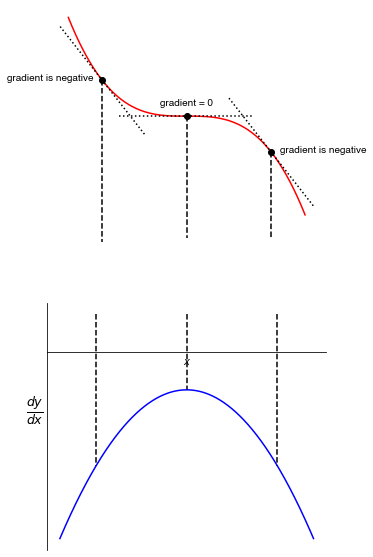

In [36]:
x = numpy.linspace(-1.4, 1.4, 5000)

fig,axis=plt.subplots(nrows=2,ncols=1,figsize=(5,10))

axis[0].axis('off')

y = -x**3
axis[0].plot(x, y,'r-')

axis[0].plot(0,0,'ko')
axis[0].annotate('gradient = 0',xy=(0,0.3),c='k',ha='center')
axis[0].plot((-0.8,0.8),(0,0),'k:')

axis[0].plot(1,-1,'ko')
axis[0].annotate('gradient is negative',xy=(1.1,-1),c='k',ha='left')
axis[0].plot((0.5,1.5),(0.5,-2.5),'k:')

axis[0].plot(-1,1,'ko')
axis[0].annotate('gradient is negative',xy=(-1.1,1),c='k',ha='right')
axis[0].plot((-0.5,-1.5),(-0.5,2.5),'k:')

# axis[0].annotate('$\\frac{dy}{dx} = 0$',xy=(0,1),ha='center',fontsize=18,c='r')

axis[0].plot((0,0),(0,-3.375),'k--')
axis[1].plot((0,0),(1,-1),'k--')

axis[0].plot((1,1),(-1,-3.375),'k--')
axis[1].plot((1,1),(1,-3),'k--')

axis[0].plot((-1,-1),(1,-3.5),'k--')
axis[1].plot((-1,-1),(1,-3),'k--')


dydx=numpy.concatenate([2*x[x<0]-1,-2*x[x>=0]-1])
dydx=-2*x**2-1
# axis[1].spines['left'].set_position('zero')
axis[1].spines['right'].set_color('none')
axis[1].spines['bottom'].set_position('zero')
axis[1].spines['top'].set_color('none')
axis[1].set_xlabel('$x$')
axis[1].set_ylabel('$\\frac{dy}{dx}$',rotation=0,fontsize=18,ha='right')
axis[1].tick_params(axis='both',which='both',bottom=False,top=False,labelbottom=False,labelleft=False,left=False)
axis[1].tick_params(axis='y',which='both',bottom=False,top=False,labelbottom=False)
# axis[1].annotate('$\\frac{d^2y}{dx^2} = 0$',xy=(0,-2),ha='center',fontsize=18,c='b')
axis[1].plot(x, dydx,'b-')

plt.show()

code_toggle()

In the example shown here the gradient is zero and the gradient of the gradient changes sign as you pass through the point such that it is also zero at the point.

A point of inflexion always has 

$$
\frac{d^2y}{dx^2} = 0
$$

but $\frac{dy}{dx}$ is not *necessarily* zero.

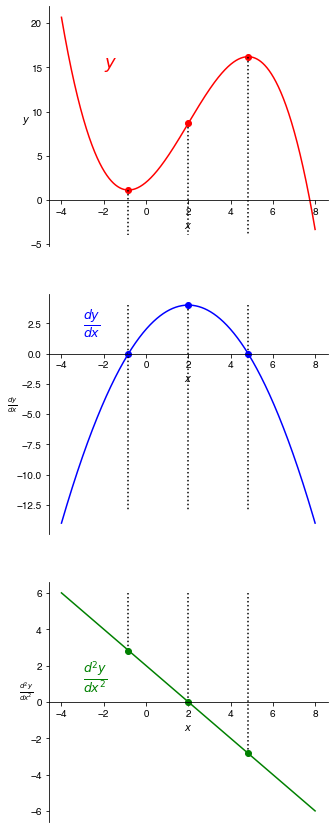

In [37]:
x = numpy.linspace(-4, 8, 5000)

fig,axis=plt.subplots(nrows=3,ncols=1,figsize=(5,15))

# axis.axis('off')

for i in [0, 1, 2]:
    axis[i].set_xlabel('$x$')
    # axis.spines['left'].set_position('zero')
    axis[i].spines['right'].set_color('none')
    axis[i].spines['bottom'].set_position('zero')
    axis[i].spines['top'].set_color('none')

axis[0].set_ylabel('$y$',rotation=0)
axis[1].set_ylabel('$\\frac{dy}{dx}$',rotation=0)
axis[2].set_ylabel('$\\frac{d^2y}{dx^2}$',rotation=0)

y = -(x**3)/6 + x**2 + 2*x + 2 
axis[0].plot(x, y,'r-')

axis[0].annotate('$y$',xy=(-2,15),ha='left',fontsize=18,c='r')
axis[1].annotate('$\\frac{dy}{dx}$',xy=(-3,2),ha='left',fontsize=18,c='b')
axis[2].annotate('$\\frac{d^2y}{dx^2}$',xy=(-3,1),ha='left',fontsize=18,c='g')

axis[0].plot((2,2),(26/3,-4),'k:')
axis[1].plot((2,2),(4,-13),'k:')
axis[2].plot((2,2),(6,0),'k:')

axis[0].plot(2,26/3,'ro')
axis[0].plot(4.8284,16.2091,'ro')
axis[0].plot(-0.8284,1.124,'ro')

axis[0].plot((4.8284,4.8284),(16.2091,-4),'k:')
axis[1].plot((4.8284,4.8284),(4,-13),'k:')
axis[2].plot((4.8284,4.8284),(6,-2.8284),'k:')

axis[1].plot(2,4,'bo')
axis[1].plot(4.8284,0,'bo')
axis[1].plot(-0.8284,0,'bo')

axis[0].plot((-0.8284,-0.8284),(1.124,-4),'k:')
axis[1].plot((-0.8284,-0.8284),(4,-13),'k:')
axis[2].plot((-0.8284,-0.8284),(6,2.8284),'k:')

axis[2].plot(2,0,'go')
axis[2].plot(4.8284,-2.824,'go')
axis[2].plot(-0.8284,2.824,'go')


y = -(x**2)/2 + 2*x + 2
axis[1].plot(x, y,'b-')

y = -x + 2
axis[2].plot(x, y,'g-')

plt.show()

code_toggle()

### How to locate and identify turning points

The above suggests a way of finding the turning points of a given function.

1. Differentiate the function to get $f'(x)$, find the values of $x$ where $f'(x) = 0$. This tells us where any maximia and minima (and potentially also points of inflexion that happen to have zero gradient), but NOT which is which.
2. Differiate a second time to get $f''(x)$. Substitute in the values $x$ we have just found and check to see if $f''(x)$ is negative, positive or zero.
3. To find any points of inflexion set $f''(x)=0$.
4. Substitute the solutions of $f'(x)=0$ found in step 1 into $f(x)$ so we find the values of $(x,f(x))$.

If the first differential (gradient, $f'(x)$ or $\frac{dy}{dx}$ is POSITIVE then the point is a MINIMUM. If it is negative, then the point is a MAXIMUM.

### Example

Find the turning points of 

$$ y = 2x^3 -5x^2 -4x $$

#### Step 1. Differentiate with respect to $x$.

$$ \frac{dy}{dx} = 6x^2 -10x -4 $$

when $\frac{dy}{dx} = 0$ we have maxima and/or minima and possibly points of inflexion. To find these we solve

\begin{eqnarray*}
6x^2 -10x -4  &=& 0\\
(3x+1)(2x-4) &=&0\\
x &=& -1/3 \quad\text{or}\quad x =2
\end{eqnarray*}

#### Step 2. Differentiate a second time.

$$ \frac{d^2y}{dx^2} = 12x -10$$

at $x= -1/3$, $\frac{d^2y}{dx^2} = 12(-1/3) - 10 = -14$ which is negative, $\therefore x=-1/3$ is a MAXIMUM.

at $x=2$, $\frac{d^2y}{dx^2} = 12(2) - 10 = 14$ which is positive, $\therefore x=-1/3$ is a MINIMUM.

$$\therefore \text{MAXIMUM at} \left ( -\frac{1}{3},\frac{19}{27} \right )$$
$$\therefore \text{MINIMUM at} \left ( 2,-12 \right )$$

#### Step 3. Check for points of inflexion

when $\frac{d^2y}{dx^2} = 0$ we have points of inflexion. To find these we solve

\begin{eqnarray*}
12x-10 &=& 0\\
x &=& \frac{5}{6}\\
\end{eqnarray*}

find $y$ when $x=5/6$ 

\begin{eqnarray*}
 y &=& 2 \left(\frac{5}{6}\right)^3 - 5\left(\frac{5}{6}\right)^2 - 4 \times \frac{5}{6}\\
   &=& \frac{2 \times 125}{216} - \frac{125}{36} - \frac{30}{6}\\
   &=& \frac{250 - (6 \times 125) - (36 \times 20}{216}\\
   &=& \frac{250-750-720}{216}\\
   &=& \frac{-1220}{216}\\
   &=& \frac{-305}{54}\\
   &=& -5.65 \quad\text{(3sf)}\\
\end{eqnarray*}

Note manipulation of fractions! Whatever you do to the numerator (top) you also have to do the denominator (bottom).

Now we have enough information to sketch our function and label the turning points:

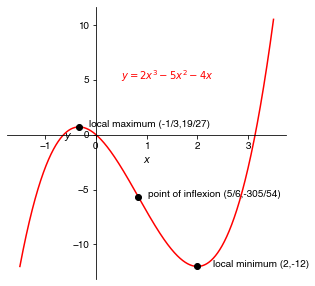

In [38]:
x = numpy.linspace(-1.5, 3.5, 5000)

# plt.xkcd()
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(5,5))

# axis.set_xlim([0,3])
axis.set_xticks(numpy.arange(-3,4))
axis.set_xlabel('$x$')
# axis.set_ylim([-30,30])
#     axis[i].set_yticks([0,10,20])
axis.set_ylabel('$y$',rotation=0)
axis.spines['left'].set_position('zero')
axis.spines['right'].set_color('none')
axis.spines['bottom'].set_position('zero')
axis.spines['top'].set_color('none')

y = 2*x**3 -5*x**2 -4*x 
axis.annotate('$y=2x^3 -5x^2- 4x$',xy=(0.5,5),c='r',ha='left')
axis.plot(x, y,'r-')
axis.plot(2,-12,'ko')
axis.annotate('local minimum (2,-12)',xy=(2.3,-12),c='k',ha='left')
axis.plot(-0.3333,19/27,'ko')
axis.annotate('local maximum (-1/3,19/27)',xy=(-1/3+0.2,19/27),c='k',ha='left')
axis.plot(5/6,-305/54,'ko')
axis.annotate('point of inflexion (5/6,-305/54)',xy=(5/6+0.2,-305/54),c='k',ha='left')
plt.show()

code_toggle()

### A bit more on points of inflexion

At a point of inflexion this is always true: $f''(x) = 0$. The first gradient may or may not be zero, i.e. $f'(x)  =0$ or $f'(x) \neq 0$.

#### Example

\begin{align*}
y&=x^3\\
f'(x) = \frac{dy}{dx} &= 3x^2\\
0 &= 3x^2 \quad\text{at a turning point}\\
\implies x &= 0\\
f''(x) = \frac{dy}{dx} &= 6x
\end{align*}


hence when $x=0$, $f'(x)=0$ and $f''(x)=0$. $\therefore$ there is a point of inflexion at $(0,0)$ and this one happens to have zero gradient.

### Biochemistry Example: Buffers

Plot of pH against concentration of added hydroxide (OH$^-$) ions for the acetate-acetic acid system

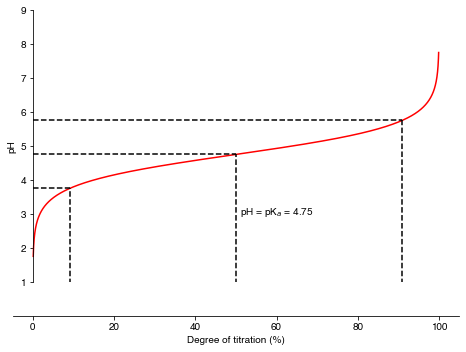

In [39]:
x = numpy.linspace(0.1, 99.9, 10000)

# plt.xkcd()
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(8,5))

# axis.set_xlim([0,3])
# axis.set_xticks(numpy.arange(-3,4))
axis.set_xlabel('Degree of titration (%)')
axis.set_ylim([1,9])
#     axis[i].set_yticks([0,10,20])
axis.set_ylabel('pH',rotation=90)
axis.spines['left'].set_position('zero')
axis.spines['right'].set_color('none')
axis.spines['bottom'].set_position('zero')
axis.spines['top'].set_color('none')

y = 4.75 + numpy.log10(x/(100-x)) # - numpy.log((100-x)/100)
axis.annotate('pH = pK$_a$ = 4.75',xy=(51,3),c='k',ha='left')
axis.plot(x, y,'r-')
axis.plot((50,50),(0,4.75),'k--')
axis.plot((0,50),(4.75,4.75),'k--')

axis.plot((90.9,90.9),(0,5.75),'k--')
axis.plot((0,90.9),(5.75,5.75),'k--')

axis.plot((9.09,9.09),(0,3.75),'k--')
axis.plot((0,9.09),(3.75,3.75),'k--')

plt.show()

code_toggle()

We can show (not in this course) that varying the degree of titration in the range 9.1-90.9% only alters the pH by two units, when we are close to the pK$_a$.

## Why do I need to learn calculus again?

(from start of lecture) I have some bacteria growing on a plate. By taking measurements I am able to fit the following polynomial (just involves powers of $x$ and numbers) equation to your data, a bit like we did at the end of the last lecture.

$$
n(t) = 15.42 + 6t -t^2
$$

where $n(t)$ is the number of bacteria in thousands after $t$ (measured in days). When will I have the greatest number of bacteria?

Now we see that to answer this, we differentiate $n(t)$ with respect to $t$, set $\frac{dn}{dt} = 0$ (equivalently $n'(t) =0$) and solve for $n$. This will give us the locations of any turning points. By differentiating again to get  $\frac{d^2n}{dt^2}$ (equivalently $n''(t) =0$) we can test the sign of $\frac{d^2n}{dt^2}$ at each turning point to identify whether they are a maximum or minimum. 

\begin{eqnarray*}
\frac{dn}{dt} &=& 6 - 2t\\
           0 &=& 6-2t\\
           -2t &=& 6\\
           t &=&3
\end{eqnarray*}

Since

$$\frac{d^2n}{dt^2} = -2$$

then this is a maximum (and so will be the greatest number of bacteria). To find that out, we simply substitute $t=3$ days back into the expression for $n(t)$.

$$\boxed{n=24.6 \times 10^3 \quad \text{bacteria}}$$


Oh, and you can enjoy [xkcd](https://xkcd.com) comics!


![Oh, and you can enjoy xkcd comics!](images/xkcd-newton_and_leibniz.png)